# Spatial Queries and Joins

In [1]:
from shapely.geometry import Point, Polygon

p1 = Point(24.952242, 60.1696017)
p2 = Point(24.976567, 60.1612500)

In [2]:
coords = [(24.950899, 60.169158), (24.953492, 60.169158), (24.953510, 60.170104), (24.950958, 60.169990)]
poly = Polygon(coords)

In [3]:
print(p1)
print(p2)
print(poly)

POINT (24.952242 60.1696017)
POINT (24.976567 60.16125)
POLYGON ((24.950899 60.169158, 24.953492 60.169158, 24.95351 60.170104, 24.950958 60.16999, 24.950899 60.169158))


In [4]:
p1.within(poly)

True

In [5]:
p2.within(poly)

False

In [6]:
print(p1)
print(poly.centroid)

POINT (24.952242 60.1696017)
POINT (24.95224242849236 60.16960179038188)


In [7]:
poly.contains(p1)

True

In [8]:
poly.contains(p2)

False

#### Intersect

In [9]:
from shapely.geometry import LineString, MultiLineString

line_a = LineString([(0, 0), (1, 1)])
line_b = LineString([(1, 1), (0, 2)])

In [10]:
line_a.intersects(line_b)

True

In [11]:
line_a.touches(line_b)

True

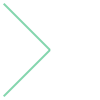

In [12]:
multi_line = MultiLineString([line_a, line_b])
multi_line

In [13]:
import geopandas as gpd

fp = r'L3_data/addresses.shp'
data = gpd.read_file(fp)
data.head()

,address,id,addr,geometry
0,"Ruoholahti, 14, Itämerenkatu, Ruoholahti, Läns...",1000,"Itämerenkatu 14, 00101 Helsinki, Finland",POINT (24.91556 60.16320)
1,"Kamppi, 1, Kampinkuja, Kamppi, Eteläinen suurp...",1001,"Kampinkuja 1, 00100 Helsinki, Finland",POINT (24.93169 60.16902)
2,"Bangkok9, 8, Kaivokatu, Keskusta, Kluuvi, Etel...",1002,"Kaivokatu 8, 00101 Helsinki, Finland",POINT (24.94168 60.16996)
3,"1, Hermannin rantatie, Hermanninmäki, Hermanni...",1003,"Hermannin rantatie 1, 00580 Helsinki, Finland",POINT (24.96554 60.20089)
4,"Hesburger, 9, Tyynenmerenkatu, Jätkäsaari, Län...",1005,"Tyynenmerenkatu 9, 00220 Helsinki, Finland",POINT (24.92160 60.15665)


#### Reading KML-files in Geopandas

In [14]:
gpd.io.file.fiona.drvsupport.supported_drivers

{'AeronavFAA': 'r',
 'ARCGEN': 'r',
 'BNA': 'raw',
 'DXF': 'raw',
 'CSV': 'raw',
 'OpenFileGDB': 'r',
 'ESRI Shapefile': 'raw',
 'GeoJSON': 'rw',
 'GPKG': 'rw',
 'GML': 'raw',
 'GPX': 'raw',
 'GPSTrackMaker': 'raw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'PCIDSK': 'r',
 'S57': 'r',
 'SEGY': 'r',
 'SUA': 'r'}

In [15]:
# KML is not available by default, and must be added manually
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'

In [16]:
gpd.io.file.fiona.drvsupport.supported_drivers

{'AeronavFAA': 'r',
 'ARCGEN': 'r',
 'BNA': 'raw',
 'DXF': 'raw',
 'CSV': 'raw',
 'OpenFileGDB': 'r',
 'ESRI Shapefile': 'raw',
 'GeoJSON': 'rw',
 'GPKG': 'rw',
 'GML': 'raw',
 'GPX': 'raw',
 'GPSTrackMaker': 'raw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'PCIDSK': 'r',
 'S57': 'r',
 'SEGY': 'r',
 'SUA': 'r',
 'KML': 'rw'}

In [17]:
fp = 'L3_data/PKS_suuralue.kml'
polys = gpd.read_file(fp, driver='KML')

In [18]:
polys.head()

,Name,Description,geometry
0,Suur-Espoonlahti,,"POLYGON Z ((24.77506 60.10906 0.00000, 24.7766..."
1,Suur-Kauklahti,,"POLYGON Z ((24.61578 60.17257 0.00000, 24.6155..."
2,Vanha-Espoo,,"POLYGON Z ((24.67576 60.21201 0.00000, 24.6752..."
3,Pohjois-Espoo,,"POLYGON Z ((24.76792 60.26920 0.00000, 24.7699..."
4,Suur-Matinkylä,,"POLYGON Z ((24.75361 60.16631 0.00000, 24.7537..."


<AxesSubplot:>

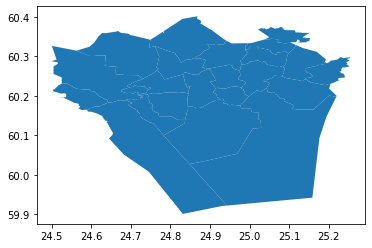

In [19]:
polys.plot()

In [20]:
southern = polys.loc[polys['Name'] == 'Eteläinen']

In [21]:
southern.reset_index(drop=True, inplace=True)

In [22]:
southern.head()

,Name,Description,geometry
0,Eteläinen,,"POLYGON Z ((24.78277 60.09997 0.00000, 24.8197..."


<AxesSubplot:>

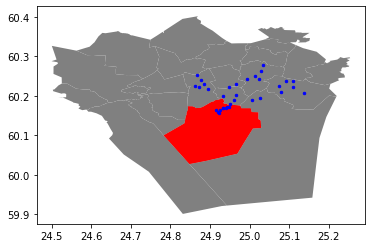

In [23]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# Plot polygons
polys.plot(ax=ax, facecolor='gray')
southern.plot(ax=ax, facecolor='red')

# Plot polygons
data.plot(ax=ax, color='blue', markersize=6)

In [24]:
from shapely import speedups
speedups.enabled

True

In [25]:
points_in_polygon = data.within(southern.at[0, 'geometry'])
points_in_polygon

0      True
1      True
2      True
3     False
4      True
5     False
6     False
7     False
8     False
9     False
10     True
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30     True
31     True
32     True
33     True
dtype: bool

In [26]:
points_in_area = data.loc[points_in_polygon]

In [27]:
points_in_area.head()

,address,id,addr,geometry
0,"Ruoholahti, 14, Itämerenkatu, Ruoholahti, Läns...",1000,"Itämerenkatu 14, 00101 Helsinki, Finland",POINT (24.91556 60.16320)
1,"Kamppi, 1, Kampinkuja, Kamppi, Eteläinen suurp...",1001,"Kampinkuja 1, 00100 Helsinki, Finland",POINT (24.93169 60.16902)
2,"Bangkok9, 8, Kaivokatu, Keskusta, Kluuvi, Etel...",1002,"Kaivokatu 8, 00101 Helsinki, Finland",POINT (24.94168 60.16996)
4,"Hesburger, 9, Tyynenmerenkatu, Jätkäsaari, Län...",1005,"Tyynenmerenkatu 9, 00220 Helsinki, Finland",POINT (24.92160 60.15665)
10,"Rautatientori, Keskusta, Kluuvi, Eteläinen suu...",1011,"Rautatientori 1, 00100 Helsinki, Finland",POINT (24.94409 60.17130)


<AxesSubplot:>

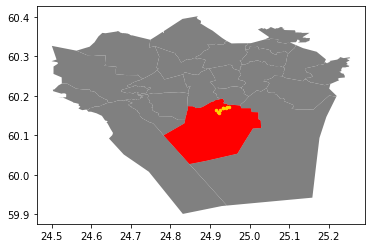

In [28]:
fig, ax = plt.subplots()

# Plot polygons
polys.plot(ax=ax, facecolor='gray')
southern.plot(ax=ax, facecolor='red')

# Plot polygons
points_in_area.plot(ax=ax, color='gold', markersize=6)

In [29]:
from pyproj import CRS
import requests
import geojson


In [30]:
url = 'https://kartta.hsy.fi/geoserver/wfs'

params = dict(
    service='WFS',
    version='2.0.0',
    request='GetFeature',
    typeName='asuminen_ja_maankaytto:Vaestotietoruudukko_2018',
    outputFormat='json'
)
# test_url = 'https://kartta.hsy.fi/geoserver/wfs?service=wfs&version=2.0.0&request=GetFeature&typeName=asuminen_ja_maankaytto:Vaestotietoruudukko_2018&outputFormat=json&maxFeatures=10'

r = requests.get(url, params=params, verify=False)

pop = gpd.GeoDataFrame.from_features(geojson.loads(r.content))

/Users/cristian/opt/anaconda3/envs/geo/lib/python3.6/site-packages/urllib3/connectionpool.py:1020: InsecureRequestWarning: Unverified HTTPS request is being made to host 'kartta.hsy.fi'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


In [31]:
pop.head()

,geometry,index,asukkaita,asvaljyys,ika0_9,ika10_19,ika20_29,ika30_39,ika40_49,ika50_59,ika60_69,ika70_79,ika_yli80
0,"POLYGON ((25472499.995 6689749.005, 25472499.9...",688,9,28.0,99,99,99,99,99,99,99,99,99
1,"POLYGON ((25472499.995 6685998.998, 25472499.9...",703,5,51.0,99,99,99,99,99,99,99,99,99
2,"POLYGON ((25472499.995 6684249.004, 25472499.9...",710,8,44.0,99,99,99,99,99,99,99,99,99
3,"POLYGON ((25472499.995 6683999.005, 25472499.9...",711,5,90.0,99,99,99,99,99,99,99,99,99
4,"POLYGON ((25472499.995 6682998.998, 25472499.9...",715,11,41.0,99,99,99,99,99,99,99,99,99


In [32]:
pop = pop.rename(columns={'asukkaita': 'pop18'})
pop.columns

Index(['geometry', 'index', 'pop18', 'asvaljyys', 'ika0_9', 'ika10_19',
       'ika20_29', 'ika30_39', 'ika40_49', 'ika50_59', 'ika60_69', 'ika70_79',
       'ika_yli80'],
      dtype='object')

In [33]:
pop = pop[['geometry', 'pop18']]

In [34]:
pop.head()

,geometry,pop18
0,"POLYGON ((25472499.995 6689749.005, 25472499.9...",9
1,"POLYGON ((25472499.995 6685998.998, 25472499.9...",5
2,"POLYGON ((25472499.995 6684249.004, 25472499.9...",8
3,"POLYGON ((25472499.995 6683999.005, 25472499.9...",5
4,"POLYGON ((25472499.995 6682998.998, 25472499.9...",11


<AxesSubplot:>

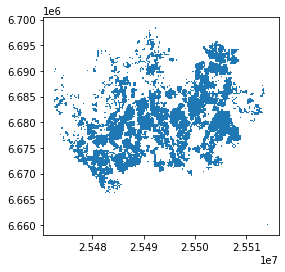

In [35]:
pop.plot()

In [36]:
data.crs = CRS.from_epsg(4326)

In [37]:
pop.crs = CRS.from_epsg(3879)

In [38]:
data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [39]:
pop.crs

<Projected CRS: EPSG:3879>
Name: ETRS89 / GK25FIN
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Finland - nominally onshore between 24°30'E and 25°30'E but may be used in adjacent areas if a municipality chooses to use one zone over its whole extent.
- bounds: (24.5, 59.94, 25.5, 68.9)
Coordinate Operation:
- name: Finland Gauss-Kruger zone 25
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [40]:
# Reproject a GeoDataFrame
data = data.to_crs(pop.crs)

In [41]:
data.crs

<Projected CRS: EPSG:3879>
Name: ETRS89 / GK25FIN
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Finland - nominally onshore between 24°30'E and 25°30'E but may be used in adjacent areas if a municipality chooses to use one zone over its whole extent.
- bounds: (24.5, 59.94, 25.5, 68.9)
Coordinate Operation:
- name: Finland Gauss-Kruger zone 25
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [42]:
data.head()

,address,id,addr,geometry
0,"Ruoholahti, 14, Itämerenkatu, Ruoholahti, Läns...",1000,"Itämerenkatu 14, 00101 Helsinki, Finland",POINT (25495311.608 6672258.695)
1,"Kamppi, 1, Kampinkuja, Kamppi, Eteläinen suurp...",1001,"Kampinkuja 1, 00100 Helsinki, Finland",POINT (25496207.840 6672906.173)
2,"Bangkok9, 8, Kaivokatu, Keskusta, Kluuvi, Etel...",1002,"Kaivokatu 8, 00101 Helsinki, Finland",POINT (25496762.723 6673010.538)
3,"1, Hermannin rantatie, Hermanninmäki, Hermanni...",1003,"Hermannin rantatie 1, 00580 Helsinki, Finland",POINT (25498088.552 6676455.030)
4,"Hesburger, 9, Tyynenmerenkatu, Jätkäsaari, Län...",1005,"Tyynenmerenkatu 9, 00220 Helsinki, Finland",POINT (25495645.995 6671528.068)


In [43]:
# Make a spatial join (use sjoin)
join = gpd.sjoin(data, pop, how='inner', op='within')

In [44]:
join.head()

,address,id,addr,geometry,index_right,pop18
0,"Ruoholahti, 14, Itämerenkatu, Ruoholahti, Läns...",1000,"Itämerenkatu 14, 00101 Helsinki, Finland",POINT (25495311.608 6672258.695),3252,515
1,"Kamppi, 1, Kampinkuja, Kamppi, Eteläinen suurp...",1001,"Kampinkuja 1, 00100 Helsinki, Finland",POINT (25496207.840 6672906.173),3364,182
2,"Bangkok9, 8, Kaivokatu, Keskusta, Kluuvi, Etel...",1002,"Kaivokatu 8, 00101 Helsinki, Finland",POINT (25496762.723 6673010.538),3488,38
10,"Rautatientori, Keskusta, Kluuvi, Eteläinen suu...",1011,"Rautatientori 1, 00100 Helsinki, Finland",POINT (25496896.601 6673159.446),3488,38
3,"1, Hermannin rantatie, Hermanninmäki, Hermanni...",1003,"Hermannin rantatie 1, 00580 Helsinki, Finland",POINT (25498088.552 6676455.030),3724,123


In [45]:
len(join)

32

In [46]:
len(data)

34

<AxesSubplot:>

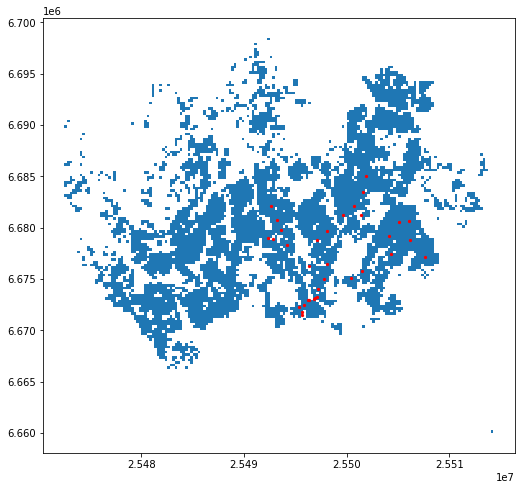

In [47]:
fig, ax = plt.subplots(figsize=(15, 8))

pop.plot(ax=ax)

data.plot(ax=ax, color='red', markersize=5)

/Users/cristian/opt/anaconda3/envs/geo/lib/python3.6/site-packages/pysal/explore/segregation/network/network.py:16: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
  "You need pandana and urbanaccess to work with segregation's network module\n"
/Users/cristian/opt/anaconda3/envs/geo/lib/python3.6/site-packages/pysal/model/spvcm/abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


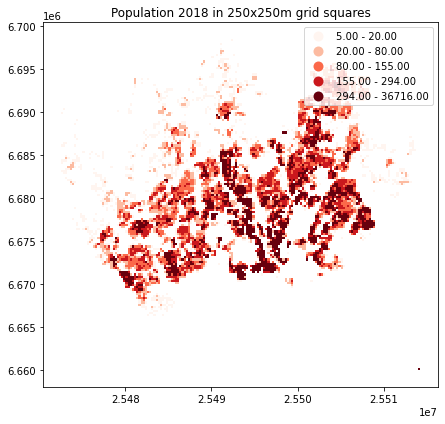

In [48]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the grid with popululation info
pop.plot(ax=ax, column='pop18', cmap='Reds', scheme='quantiles', legend=True);

plt.title('Population 2018 in 250x250m grid squares');
plt.tight_layout()

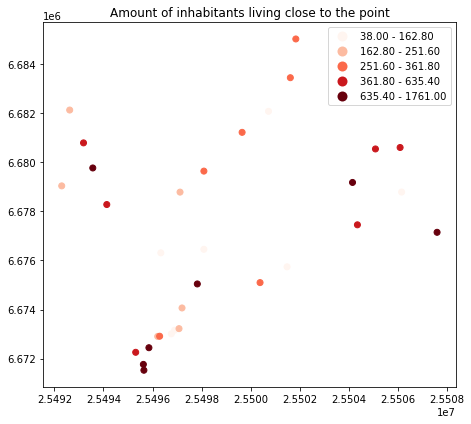

In [50]:
fig, ax = plt.subplots(figsize=(10, 6))

join.plot(ax=ax, column='pop18', cmap='Reds', scheme='quantiles', legend=True)

plt.title('Amount of inhabitants living close to the point');
plt.tight_layout();

In [52]:
join2 = join
join2.crs = {}
output = r'L3_data/addresses_population.shp'
join2.to_file(output)

## Nearest Neighbor Analysis

#### Nearest Point

In [54]:
from shapely.geometry import MultiPoint
from shapely.ops import nearest_points

In [55]:
orig = Point([1, 1.67])

dest1 = Point([0, 1.45])
dest2 = Point([2, 2])
dest3 = Point([0, 2.5])

destinations = MultiPoint([dest1, dest2, dest3])
print(destinations)

MULTIPOINT (0 1.45, 2 2, 0 2.5)


In [56]:
near_dest_geoms = nearest_points(orig, destinations)

In [57]:
type(near_dest_geoms)

tuple

In [58]:
print(near_dest_geoms)

(<shapely.geometry.point.Point object at 0x7fd4c28fa160>, <shapely.geometry.point.Point object at 0x7fd4c28fa080>)


In [59]:
print(near_dest_geoms[0])

POINT (1 1.67)


In [60]:
print(near_dest_geoms[1])

POINT (0 1.45)
